In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

fnts=12
fgs=(20/2, 6/2)
trs=0.3 # transparência
plt.style.use("seaborn-v0_8-darkgrid")

In [2]:
a0 = 2
a1 = 0.8
vet = 0.1

# Média e variância teórica do processo AR(1)
mxt = a0 / (1 - a1)
vxt = vet / (1 - a1**2)

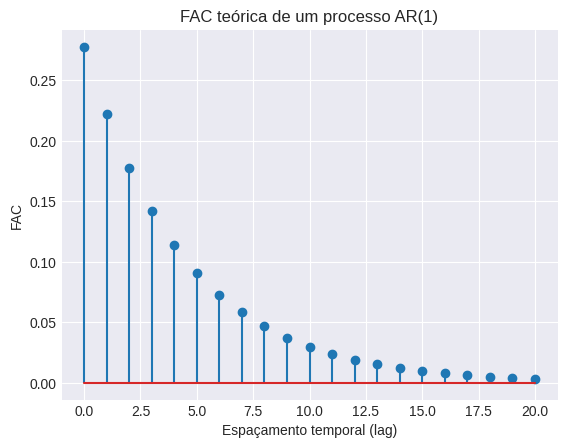

In [3]:
# FAC teórica
LAGmax = 20
tau = np.arange(LAGmax + 1)
Rxt = vxt * (a1 ** tau)

# Plotando a FAC teórica
plt.figure()
plt.stem(tau, Rxt)
plt.xlabel('Espaçamento temporal (lag)')
plt.ylabel('FAC')
plt.title('FAC teórica de um processo AR(1)')
plt.show()

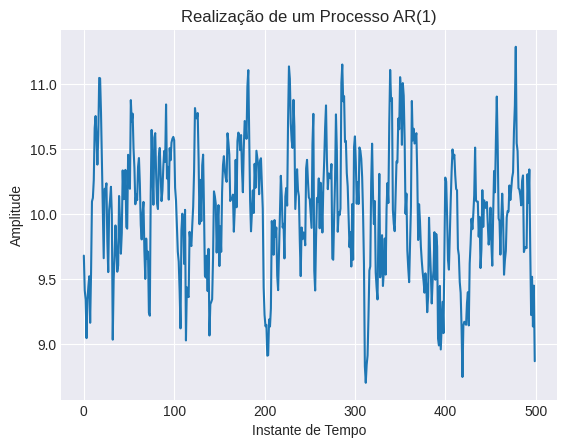

In [4]:
# Amostras do processo AR(1)
N = 5500
x = np.zeros(2 * N)
x[0] = np.random.randn()

for t in range(1, 2 * N):
    x[t] = a0 + a1 * x[t - 1] + np.random.normal(0, np.sqrt(vet))

x = x[N:]

plt.figure()
plt.plot(x[:500])
plt.xlabel('Instante de Tempo')
plt.ylabel('Amplitude')
plt.title('Realização de um Processo AR(1)')
plt.show()

Estimativa da média: 9.995642686592323
Estimativa da variância: 0.27614635311288643


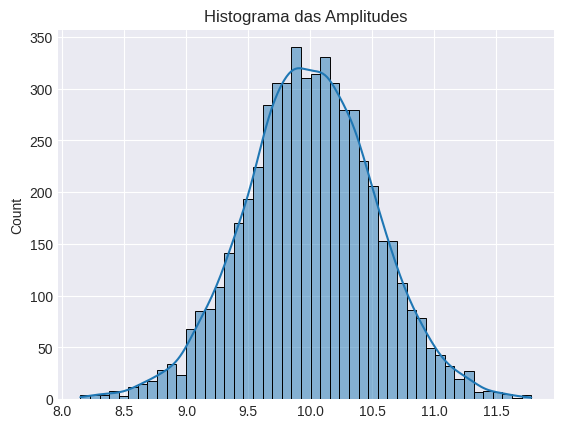

In [5]:
# Estimação da média e variância de x(t)
xbar = np.mean(x)
vxh = np.var(x)
print(f'Estimativa da média: {xbar}')
print(f'Estimativa da variância: {vxh}')


plt.figure()
sns.histplot(x, kde=True)
plt.title('Histograma das Amplitudes')
plt.show()

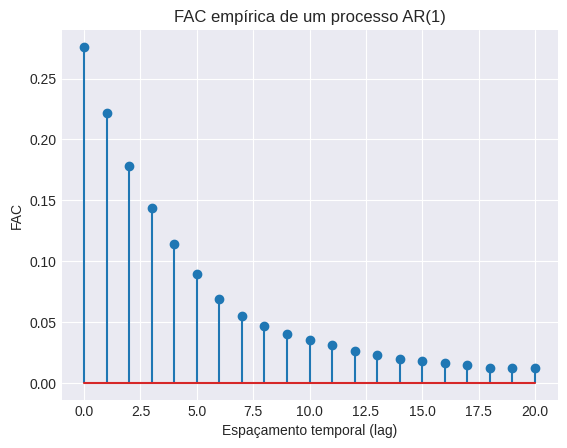

In [6]:
# Cálculo da FAC empírica
Rxh = []
for tau in range(LAGmax + 1):
    aux1 = x[:N - tau] - xbar
    aux2 = x[tau:N] - xbar
    aux3 = np.dot(aux1, aux2) / (N - tau)
    Rxh.append(aux3)

plt.figure()
plt.stem(range(LAGmax + 1), Rxh)
plt.xlabel('Espaçamento temporal (lag)')
plt.ylabel('FAC')
plt.title('FAC empírica de um processo AR(1)')
plt.show()

In [7]:
# Estimação dos coeficientes
a1h = Rxh[1] / vxh
a0h = xbar * (1 - a1h)
veh = vxh * (1 - a1h**2)
print(f'Estimativa de a1: {a1h}')
print(f'Estimativa de a0: {a0h}')
print(f'Estimativa de vet: {veh}')

Estimativa de a1: 0.8020017096353095
Estimativa de a0: 1.979120163041602
Estimativa de vet: 0.09852715694073068
